In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.manifold import MDS
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier


wine = load_wine()

wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [19]:
#print(wine['DESCR'])

df = pd.DataFrame(wine.data, columns = wine.feature_names)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [20]:
#Target name
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [21]:
#List of class
target = wine.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=0)

#Target name
wine.target_name

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train.shape

(142, 13)

In [25]:
'''
-Use different method reduction
- compute their accurancy
- Compare different accurancy and take that one has hight 
'''
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pca.fit(X_train)

PCA(n_components=2)

In [26]:
#Accuracy PCA
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9722222222222222


In [27]:
X_test.shape

(36, 2)

In [28]:
X_train.shape

(142, 2)

Text(0, 0.5, 'Second principle component')

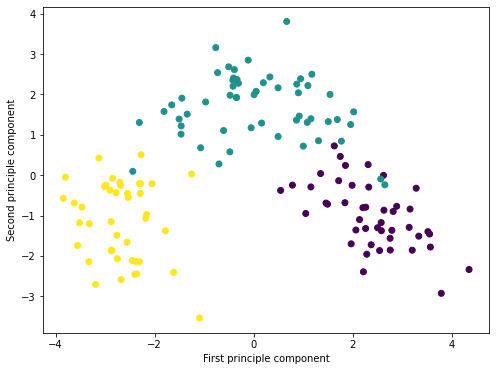

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [30]:
'''
We convert 13 dimensional space to 2 dimensional space, we lose some of the information.
By using the attribute explained_variance_ratio_, we can see that the first principal component contains 36.19% of the variance and the second principal component contains 19.20% of the variance.
Together, the two components contain 55.40% of the information.
'''
pca.explained_variance_ratio_

array([0.65627164, 0.34372836])

In [31]:
#LDA Part
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Accuracy ' + str(accuracy_score(y_test, y_pred)))


Accuracy 1.0


Text(0, 0.5, 'Second principle component')

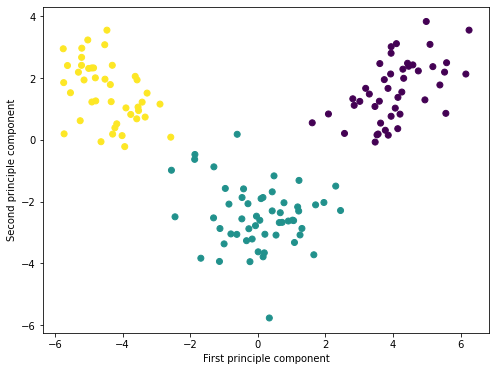

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [33]:
#MDS Part
mds = MDS(random_state=0)
X_transform = mds.fit_transform(df)
print(X_transform)

[[-1.29237716e+02 -2.92807707e+02]
 [-1.37488839e+02 -2.70425187e+02]
 [-2.15961834e+02 -3.81109727e+02]
 [-3.74692551e+02 -6.30293924e+02]
 [ 2.52312528e+01 -4.27566618e-01]
 [-3.61873050e+02 -6.02951082e+02]
 [-2.75337087e+02 -4.68154051e+02]
 [-2.86996651e+02 -4.67317237e+02]
 [-1.31243139e+02 -2.68092714e+02]
 [-1.32908397e+02 -2.67163162e+02]
 [-3.77840237e+02 -6.63083143e+02]
 [-2.72803225e+02 -4.57869923e+02]
 [-2.98904465e+02 -4.89142395e+02]
 [-2.00948299e+02 -3.49533313e+02]
 [-4.07032987e+02 -6.88943451e+02]
 [-2.79640076e+02 -4.88976554e+02]
 [-2.53704576e+02 -4.69427323e+02]
 [-1.73911943e+02 -3.41981803e+02]
 [-3.98771902e+02 -8.43077191e+02]
 [-4.00834649e+01 -9.03395876e+01]
 [ 9.40500551e+00 -4.32994585e+01]
 [-5.57872772e+00 -2.33056929e+01]
 [-1.29253423e+02 -2.57784119e+02]
 [-1.14568996e+02 -2.42978409e+02]
 [-2.69872841e+01 -9.68886762e+01]
 [-1.86869533e+01 -8.48244755e+01]
 [-2.13328773e+02 -3.94268783e+02]
 [-2.67477549e+02 -4.66990113e+02]
 [-6.96031472e+01 -1

In [34]:
stress = mds.stress_
print(stress)

33970.44992254212


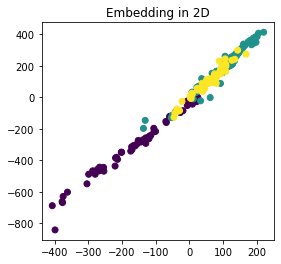

In [35]:
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], c=target)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()